# COSMOS Cluster 2: Microbiomes Got Your Bac(teria)

Microbiomes, microscopic communities of bacteria in a particular environment, exist all over the human body and are responsible for carrying out numerous essential biological functions. In fact, bacteria living on the human body outnumber human cells 10 to 1. Despite their tremendous importance, microbiomes are difficult for researchers to study and understand due to their complexity and minuscule scale. Our research examines data from The Human Microbiome Project, which contains 2,913 individual samples, measuring 43,144 variables. Using principal component analysis (PCA) to reduce our multi-dimensional data, we compared the clustering of samples from various regions of the body. We hypothesized that microbiomes can be clearly classified by which microbial varieties are present in the sample. Our PCA was successful in representing a large proportion of the variation in our data in a few principal components. By projecting the data onto principal component axes and analyzing the clustering of data points, we were able to distinguish microbiome samples taken from different regions of the body based on their unique microbial composition. 


In [0]:
# write here how many eigenvectors you want to use
numEvec = 10

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [0]:
dataF = pd.read_csv('DATA.txt',header=None,sep='\t', low_memory = False)

dataF = dataF.T

dataF.tail(10)          

,0,1,2,3,4,5,6,7,8,9,...,43134,43135,43136,43137,43138,43139,43140,43141,43142,43143
2903,700015669,male,Left_Antecubital_fossa,Skin,700015669,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2904,no data,no data,no data,no data,700014796,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2905,no data,no data,no data,no data,700014764,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2906,700099607,male,Right_Antecubital_fossa,Skin,700099607,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2907,700099606,male,Left_Antecubital_fossa,Skin,700099606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2908,700106946,male,Stool,Gastrointestinal_tract,700106946,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2909,700103482,female,Left_Antecubital_fossa,Skin,700103482,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2910,700103479,female,Stool,Gastrointestinal_tract,700103479,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2911,no data,no data,no data,no data,Consensus Lineage,Root;p__Firmicutes;c__Bacilli;o__Lactobacillal...,Root;p__Firmicutes;c__Clostridia;o__Clostridia...,Root;p__Firmicutes;c__Clostridia;o__Clostridia...,Root;p__Proteobacteria;c__Betaproteobacteria,Root;p__Actinobacteria;c__Actinobacteria;o__Ac...,...,Root;p__Firmicutes;c__Clostridia;o__Clostridia...,Root;p__Bacteroidetes;c__Bacteroidia;o__Bacter...,Root;p__Actinobacteria;c__Actinobacteria;o__Ac...,Root;p__Firmicutes;c__Bacilli;o__Lactobacillal...,Root;p__Firmicutes;c__Clostridia;o__Clostridia...,Root;p__Firmicutes;c__Clostridia;o__Clostridia...,Root;p__Firmicutes;c__Bacilli;o__Lactobacillal...,Root;p__Actinobacteria;c__Actinobacteria;o__Ac...,Root;p__Firmicutes;c__Clostridia;o__Clostridia...,Root;p__Firmicutes;c__Clostridia;o__Clostridia...
2912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
features = dataF.iloc[1:-2,5:].values
labels = dataF.iloc[1:-2,1].values
regionlabel = dataF.iloc[1:-2,3].values
specificregion = dataF.iloc[1:-2,2].values

In [0]:
def PCASolver(X, numEvec):

    pca = PCA(n_components= numEvec)
    Y = pca.fit_transform(X)
    
    return Y, pca.explained_variance_ratio_

Y, all_eigvalues = PCASolver(features, numEvec)
print(len(Y[:,0]))

2910


In [0]:
print(all_eigvalues)

[0.29860271 0.22684917 0.07953495 0.06919373 0.03948102 0.02335063
 0.01952553 0.01064689 0.00841393 0.00807735]


## Plot Variance

[29.86027086 52.54518754 60.49868273 67.41805605 71.36615758 73.70122081
 75.65377363 76.71846404 77.55986562 78.36759992]


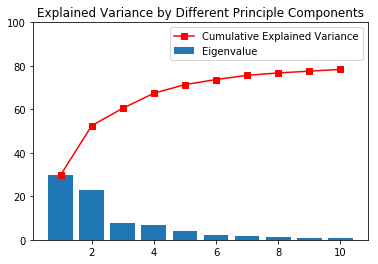

In [0]:
numPCs = numEvec
percent = [i*100 for i in sorted(all_eigvalues, reverse=True)]
cum_var_exp = np.cumsum(percent[:numPCs])
print(cum_var_exp)


plt.plot(np.arange(1,numPCs+1),cum_var_exp,color='r',marker='s')
plt.bar(np.arange(1,numPCs+1),percent)

plt.legend(['Cumulative Explained Variance','Eigenvalue'])

plt.title('Explained Variance by Different Principle Components')
plt.ylim([0,100])
plt.show()

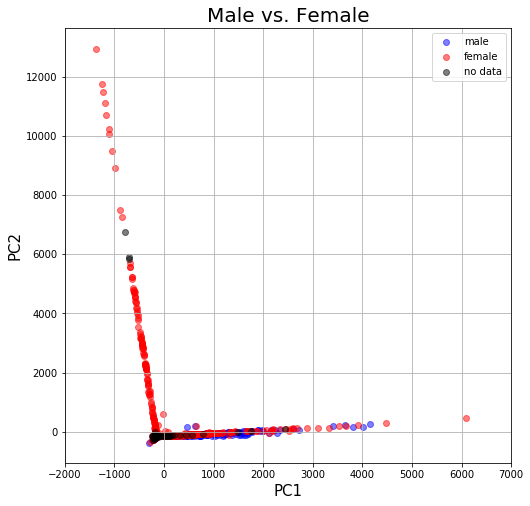

In [0]:
male = labels == 'male'
female = labels == 'female'
nodata = labels == 'no data'

male_data = Y[male]
female_data = Y[female]
nodata_data = Y[nodata] 

fig = plt.figure(figsize = (8,8))

plt.scatter(male_data[:,0],male_data[:,1],alpha=0.5,color='b')
plt.scatter(female_data[:,0],female_data[:,1],alpha=0.5,color='r')
plt.scatter(nodata_data[:,0],nodata_data[:,1],alpha=0.5,color='k')

plt.legend(['male','female','no data']) 
plt.grid()
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.xlim([-2000, 7000])
# plt.ylim([-600, 600])
plt.title("Male vs. Female", fontsize = 20)
plt.show()

## ONE BY ONE GRAPHING (each general region)

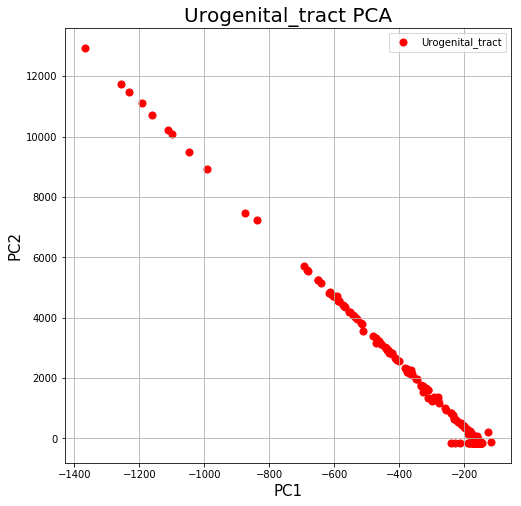

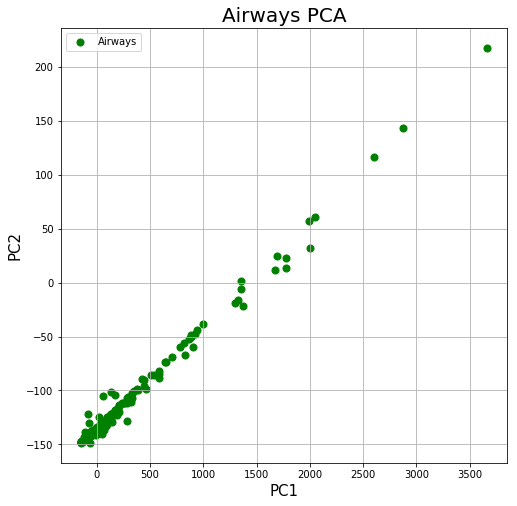

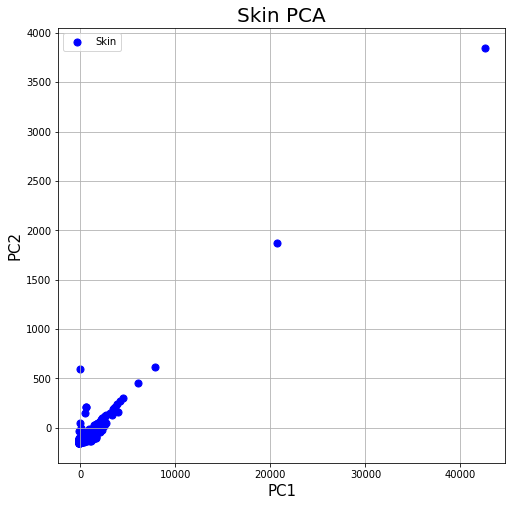

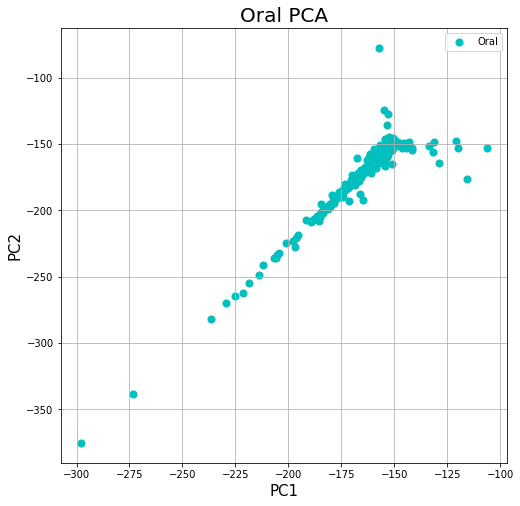

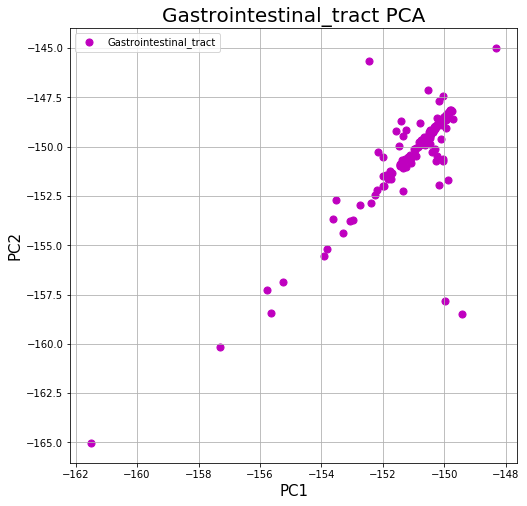

In [0]:
targets = ['Urogenital_tract', 'Airways', 'Skin', 'Oral', 'Gastrointestinal_tract']

colors = ['r', 'g', 'b','c','m']

for target, color in zip(targets,colors):

    fig = plt.figure(figsize = (8,8))
    plt.xlabel("PC1", fontsize = 15)
    plt.ylabel("PC2", fontsize = 15)
    plt.title(target +' PCA', fontsize = 20)

    indicesToKeep = regionlabel == target
    plt.scatter(Y[indicesToKeep,0], Y[indicesToKeep,1], c = color, s = 50)
    
    plt.legend([target])
    plt.grid()
    plt.show()

## COMPARING SEVERAL PCs (all general regions)

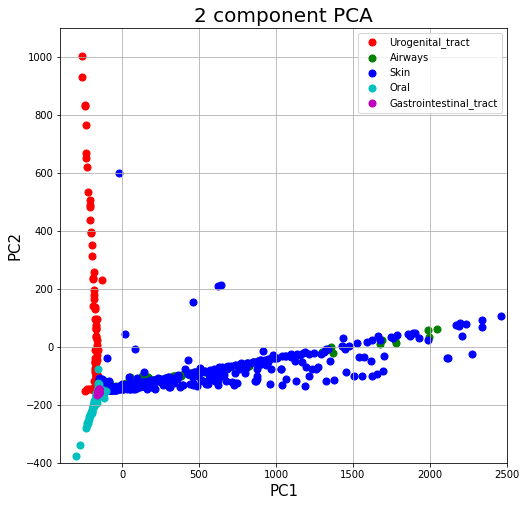

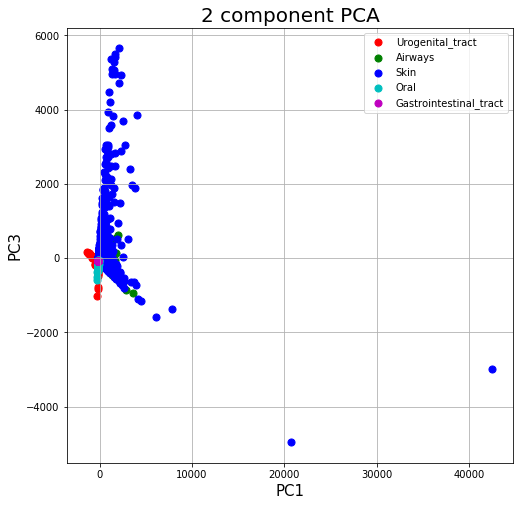

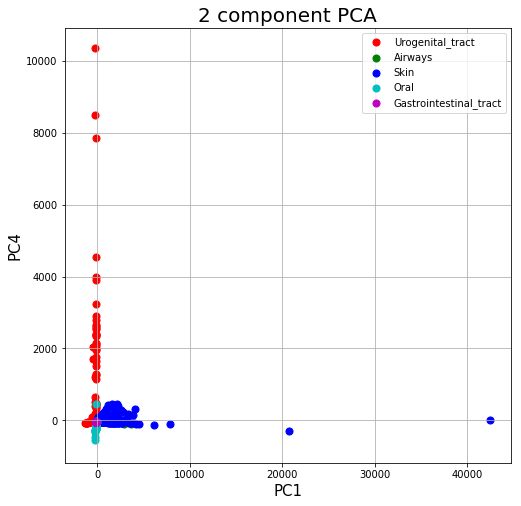

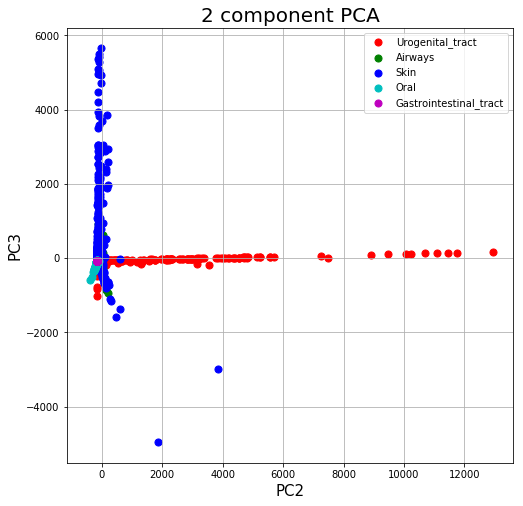

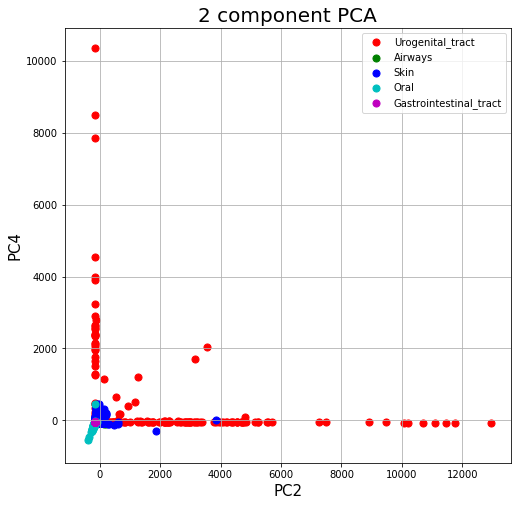

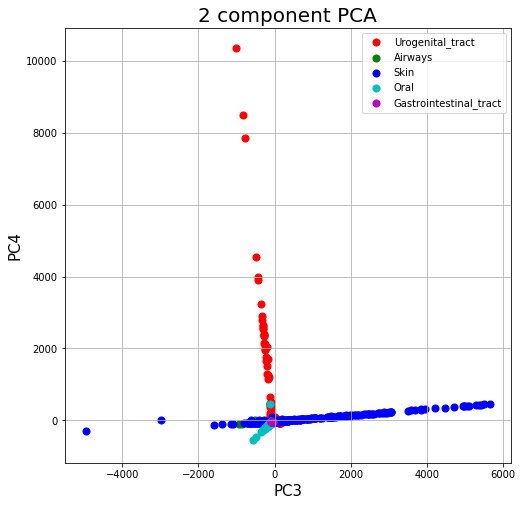

In [0]:
n = 4
stri=[]

for i in range(n):
    stri.append('PC' + str(i+1))
    
for i in range(n):
    for j in range(i+1,n):
        
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel(stri[i], fontsize = 15)
        ax.set_ylabel(stri[j], fontsize = 15)
        ax.set_title('2 component PCA', fontsize = 20)
        
        targets = ['Urogenital_tract', 'Airways', 'Skin', 'Oral', 'Gastrointestinal_tract']
#         targets = ['Urogenital_tract', 'Airways','Gastrointestinal_tract']
        colors = ['r', 'g', 'b','c','m']
        
        for target, color in zip(targets,colors):
            indicesToKeep = regionlabel == target
            ax.scatter(Y[indicesToKeep,i]
                       , Y[indicesToKeep,j]
                       , c = color
                       , s = 50)
        ax.legend(targets)
        if (i==0 and j == 1):
            ax.set_xlim(-400,2500)
            ax.set_ylim(-400,1100)
        ax.grid()
        plt.show()

# 3D All Regions Graph

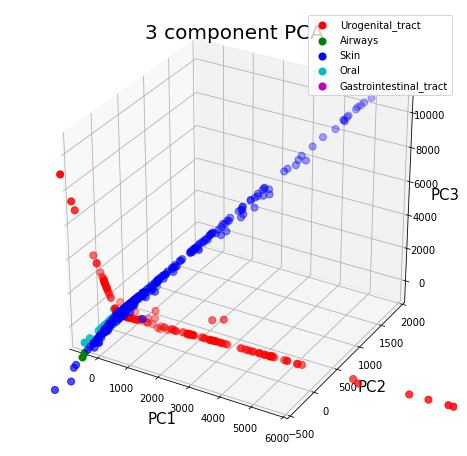

In [0]:
from mpl_toolkits.mplot3d import Axes3D
targets = ['Urogenital_tract', 'Airways', 'Skin', 'Oral', 'Gastrointestinal_tract']
colors = ['r', 'g', 'b','c','m']

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Urogenital_tract', 'Airways', 'Skin', 'Oral', 'Gastrointestinal_tract']
#         targets = ['Urogenital_tract', 'Airways','Gastrointestinal_tract']
colors = ['r', 'g', 'b','c','m']

for target, color in zip(targets,colors):
    indicesToKeep = regionlabel == target
    ax.scatter(Y[indicesToKeep,1], Y[indicesToKeep,2],Y[indicesToKeep,3], c = color, s = 50)
ax.legend(targets)
ax.set_xlim(-800,6000)
ax.set_ylim(-500,2000)
ax.grid()
plt.show()

# Comparing two different regions

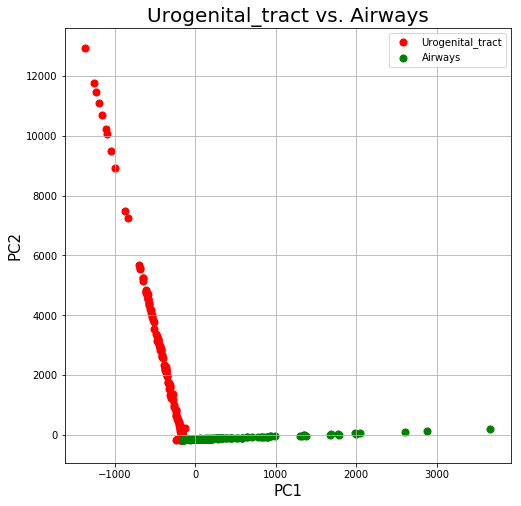

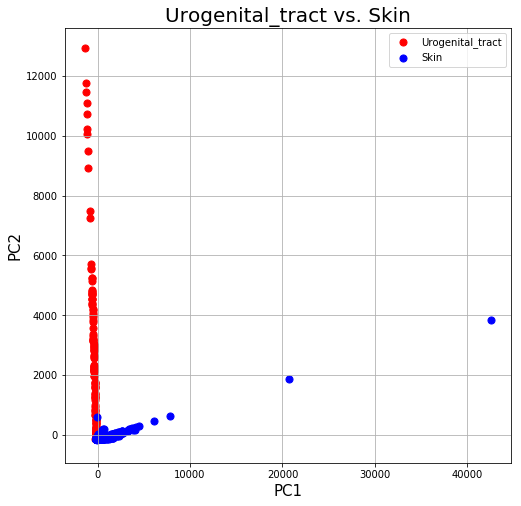

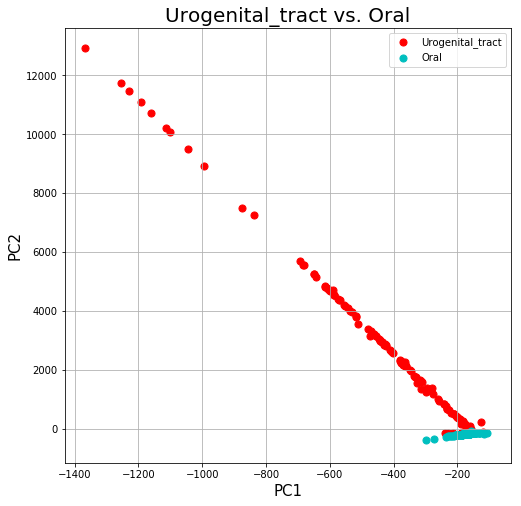

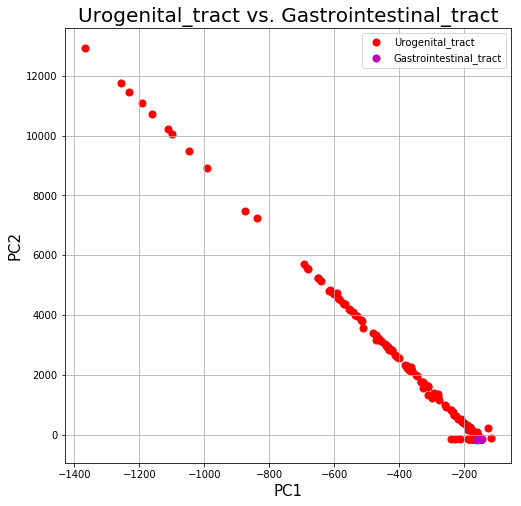

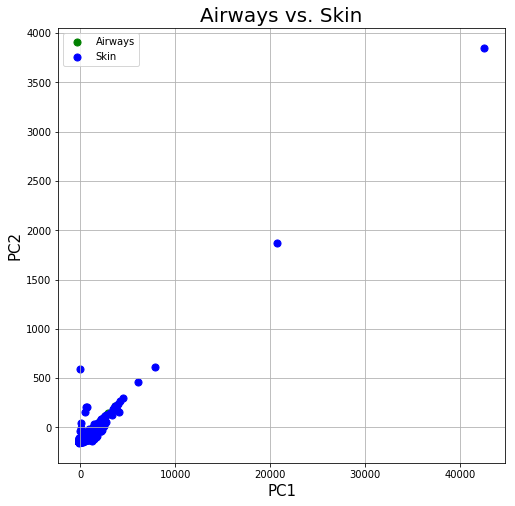

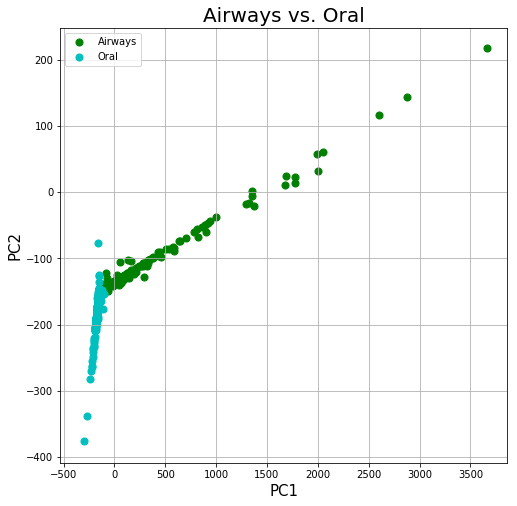

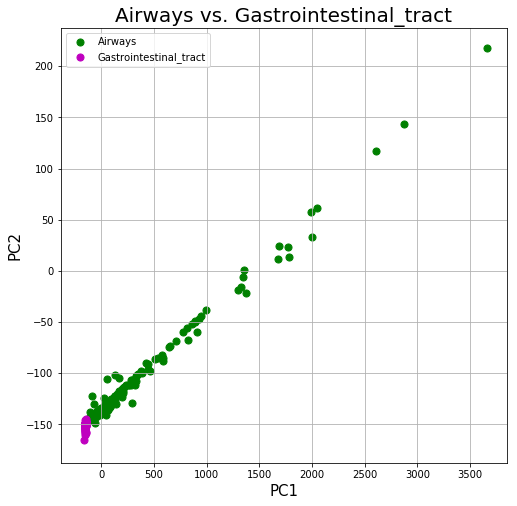

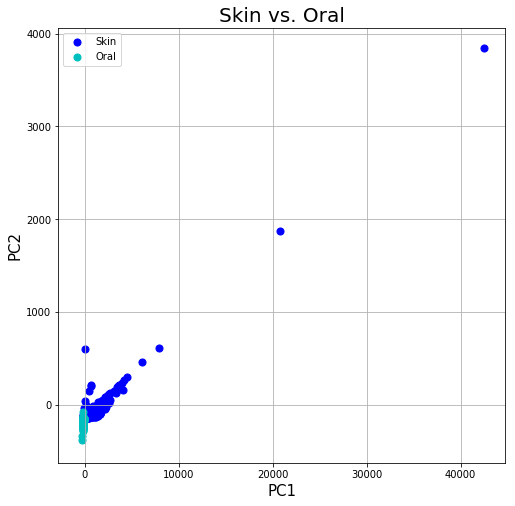

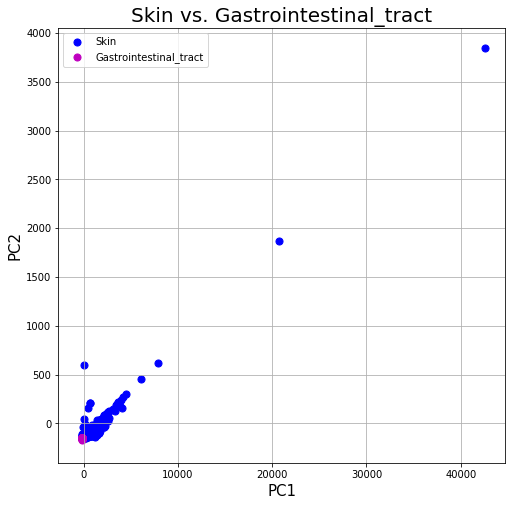

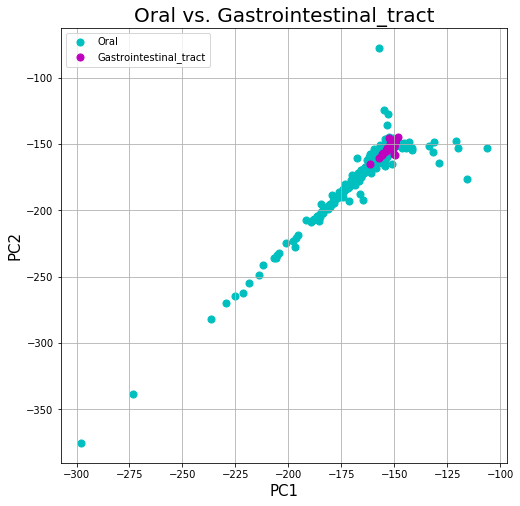

In [0]:
targets = ['Urogenital_tract', 'Airways', 'Skin', 'Oral', 'Gastrointestinal_tract']

colors = ['r', 'g', 'b','c','m']

for i in range(5):
    for j in range(i+1,5):
        target1 = targets[i]
        target2 = targets[j]
        color1 = colors[i]
        color2 = colors[j]

        fig = plt.figure(figsize = (8,8))
        plt.xlabel("PC1", fontsize = 15)
        plt.ylabel("PC2", fontsize = 15)
        plt.title(target1 + ' vs. ' + target2, fontsize = 20)

        indicesToKeep1 = regionlabel == target1
        indicesToKeep2 = regionlabel == target2
        
        plt.scatter(Y[indicesToKeep1,0], Y[indicesToKeep1,1], c = color1, s = 50)
        plt.scatter(Y[indicesToKeep2,0], Y[indicesToKeep2,1], c = color2, s = 50)
        
#         plt.xlim([-400, 100])
#         plt.ylim([-400, 0])
        plt.legend([target1, target2])
        plt.grid()
        plt.show()

# Specific Regions

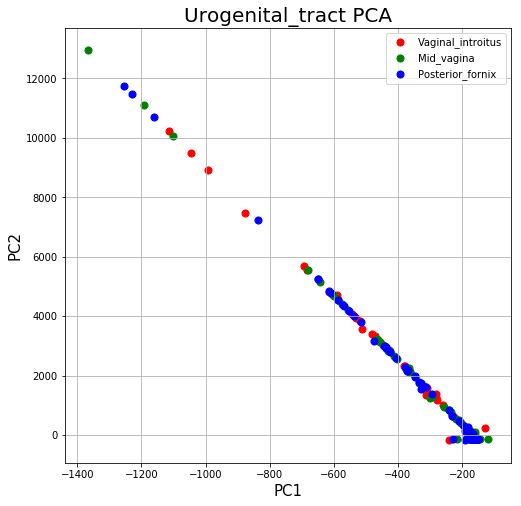

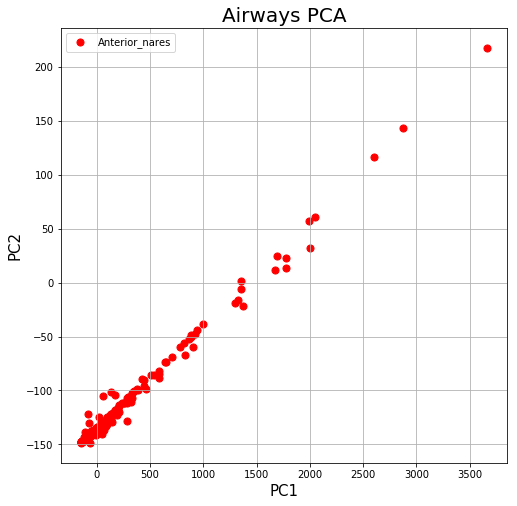

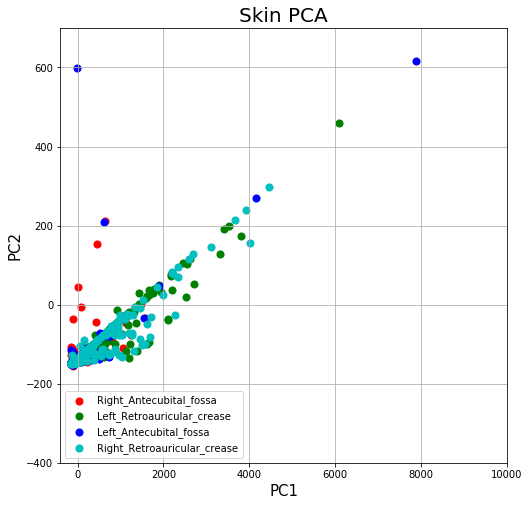

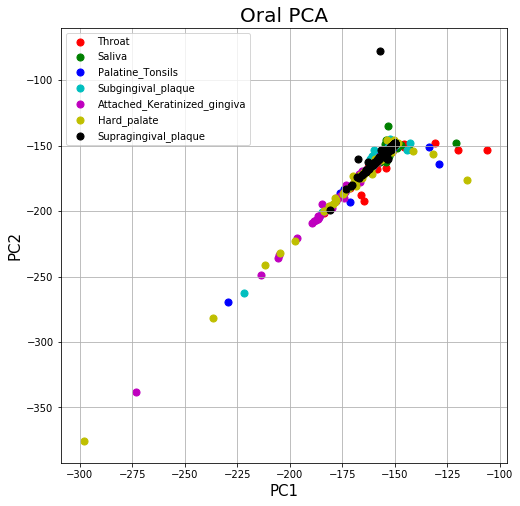

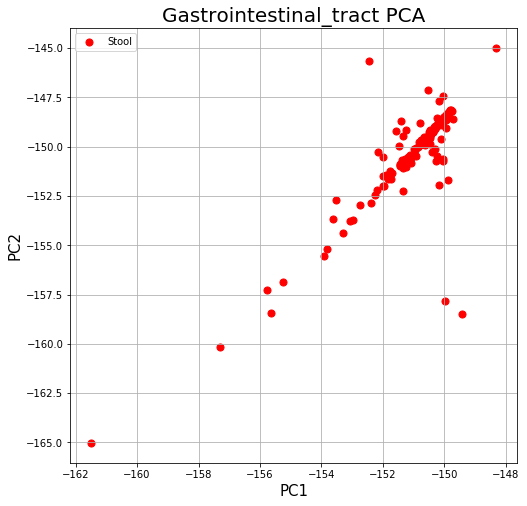

In [0]:
Y, all_eigvalues = PCASolver(features, numEvec)
targets = ['Urogenital_tract', 'Airways', 'Skin', 'Oral', 'Gastrointestinal_tract']
colors = ['r', 'g', 'b','c','m','y', 'k']

for target in targets:
    Y, all_eigvalues = PCASolver(features, numEvec)
    indicesToKeep = regionlabel == target

    Y = Y[indicesToKeep][:]
    shortenedspecific = specificregion[indicesToKeep][:]
    
    unique = []
    for x in specificregion[indicesToKeep]:
        if x not in unique:
            unique.append(x)
            
    fig = plt.figure(figsize = (8,8))
    plt.xlabel("PC1", fontsize = 15)
    plt.ylabel("PC2", fontsize = 15)
    plt.title(target+ " PCA", fontsize = 20)
    
    for specific, color in zip(unique, colors):
        
        indices = shortenedspecific == specific
        plt.scatter(Y[indices,0], Y[indices,1], c = color, s = 50)

    plt.legend(unique)
    if (target == 'Skin'):
        plt.xlim([-400, 10000])
        plt.ylim([-400, 700])
    plt.grid()
    plt.show()
    
    

# PCA For Each Region and Specific

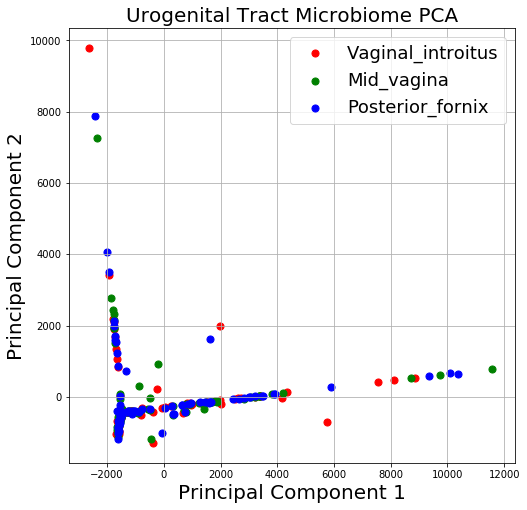

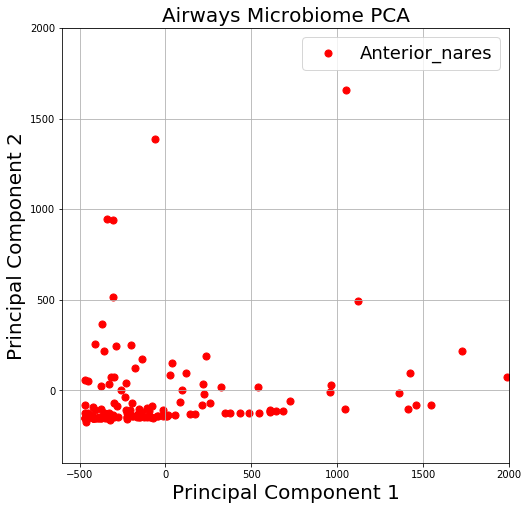

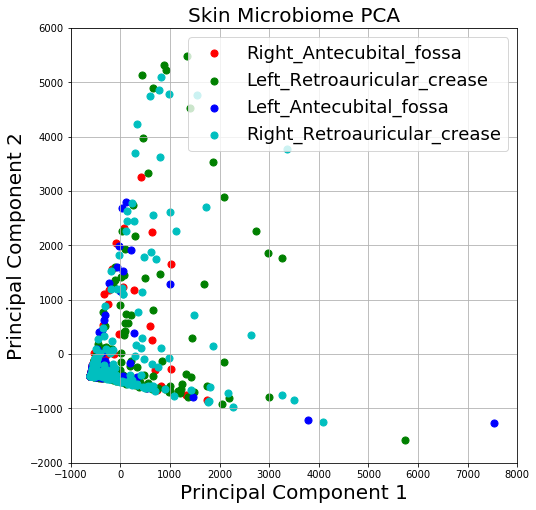

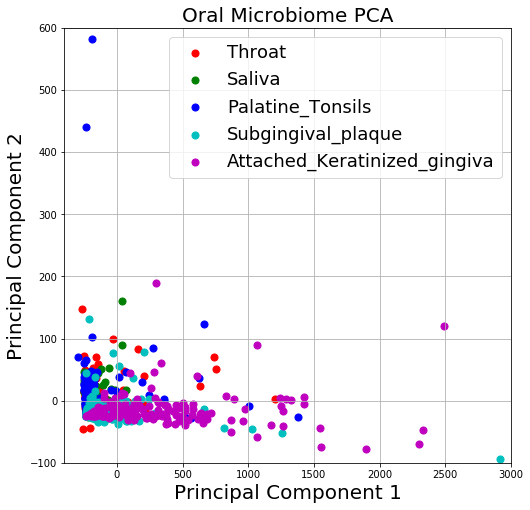

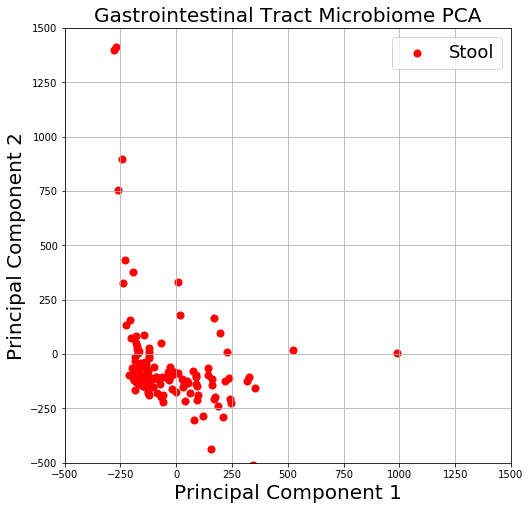

In [0]:
targets = ['Urogenital_tract', 'Airways', 'Skin', 'Oral', 'Gastrointestinal_tract']
labels = ['Urogenital Tract', 'Airways', 'Skin', 'Oral', 'Gastrointestinal Tract']
colors = ['r', 'g', 'b','c','m']
count = 0
for target in targets:
    indicesToKeep = regionlabel == target
    
    Y, all_eigvalues = PCASolver(features[indicesToKeep][:], 2)
    shortenedspecific = specificregion[indicesToKeep][:]
    
    unique = []
    for x in specificregion[indicesToKeep]:
        if x not in unique:
            unique.append(x)
            
#     print output
#     print(unique)
    fig = plt.figure(figsize = (8,8))
    plt.xlabel("Principal Component 1", fontsize = 20)
    plt.ylabel("Principal Component 2", fontsize = 20)
    plt.title(labels[count] + ' Microbiome PCA', fontsize = 20)
    count += 1
    for specific, color in zip(unique, colors):
        
        indices = shortenedspecific == specific
        plt.scatter(Y[indices,0], Y[indices,1], c = color, s = 50)
    if count == 1:
        dark = 3
        #ax.set_xlim(-400,1000)
        #ax.set_ylim(-400,1000)
    elif count == 2:
        plt.xlim(-600,2000)
        plt.ylim(-400,2000)
    elif count == 3:
        plt.xlim(-1000,8000)
        plt.ylim(-2000,6000)
    elif count == 4:
        plt.xlim(-400,3000)
        plt.ylim(-100,600)
    elif count == 5:
        plt.xlim(-500,1500)
        plt.ylim(-500,1500)
    plt.legend(unique, fontsize = 18)
#     plt.savefig(str(labels[count-1])+ ".png")
    plt.grid()
    plt.show()